### 1. Importing Libraries

In [1]:
# Data Exploration / Manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# Evaluation and Scoring
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,precision_score
from sklearn.metrics import recall_score, f1_score, RocCurveDisplay, roc_curve, auc

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### 2. Importing Dataset

In [2]:
# Import dataset
df = pd.read_csv('loan_approval_dataset.csv', skipinitialspace=True)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### 3. Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.describe().map(lambda x: f"{x:0.1f}")

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0
mean,2135.0,2.5,5059123.9,15133450.5,10.9,599.9,7472616.5,4973155.3,15126305.9,4976692.4
std,1232.5,1.7,2806839.8,9043363.0,5.7,172.4,6503636.6,4388966.1,9103753.7,3250185.3
min,1.0,0.0,200000.0,300000.0,2.0,300.0,-100000.0,0.0,300000.0,0.0
25%,1068.0,1.0,2700000.0,7700000.0,6.0,453.0,2200000.0,1300000.0,7500000.0,2300000.0
50%,2135.0,3.0,5100000.0,14500000.0,10.0,600.0,5600000.0,3700000.0,14600000.0,4600000.0
75%,3202.0,4.0,7500000.0,21500000.0,16.0,748.0,11300000.0,7600000.0,21700000.0,7100000.0
max,4269.0,5.0,9900000.0,39500000.0,20.0,900.0,29100000.0,19400000.0,39200000.0,14700000.0


In [5]:
# See how many values each categorical column contains
df['education'].value_counts()

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [6]:
df['self_employed'].value_counts()

self_employed
Yes    2150
No     2119
Name: count, dtype: int64

In [7]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

### 4. Data Preprocessing

In [8]:
# Remove index column as it is not needed anymore
df.drop('loan_id', axis=1, inplace=True)

In [9]:
# Convert monetary columns from rupees to USD for simplicity 
monetary_cols = ['income_annum', 'loan_amount', 'residential_assets_value', 
                 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'] 

for key in monetary_cols:
    df[key] = df[key].apply(lambda x : x * 0.01203).astype(np.int64)

df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,115488,359697,12,778,28872,211728,273081,96240,Approved
1,0,Not Graduate,Yes,49323,146766,8,417,32481,26466,105864,39699,Rejected
2,3,Graduate,No,109473,357291,20,506,85413,54135,400599,153984,Rejected
3,3,Graduate,No,98646,369321,8,467,218946,39699,280299,95037,Rejected
4,5,Not Graduate,Yes,117894,291126,20,382,149172,98646,353682,60150,Rejected


In [10]:
# Convert binary categorical variables to boolean numeric for increased model performance
df['education'].replace({'Not Graduate' : 0, 'Graduate' : 1}, inplace=True)
df['self_employed'].replace({'No' : 0, 'Yes' : 1}, inplace=True)
df['loan_status'].replace({'Rejected' : 0, 'Approved' : 1}, inplace=True)

In [11]:
df.dtypes

no_of_dependents            int64
education                   int64
self_employed               int64
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                 int64
dtype: object

### 5. Exploratory Data Analysis

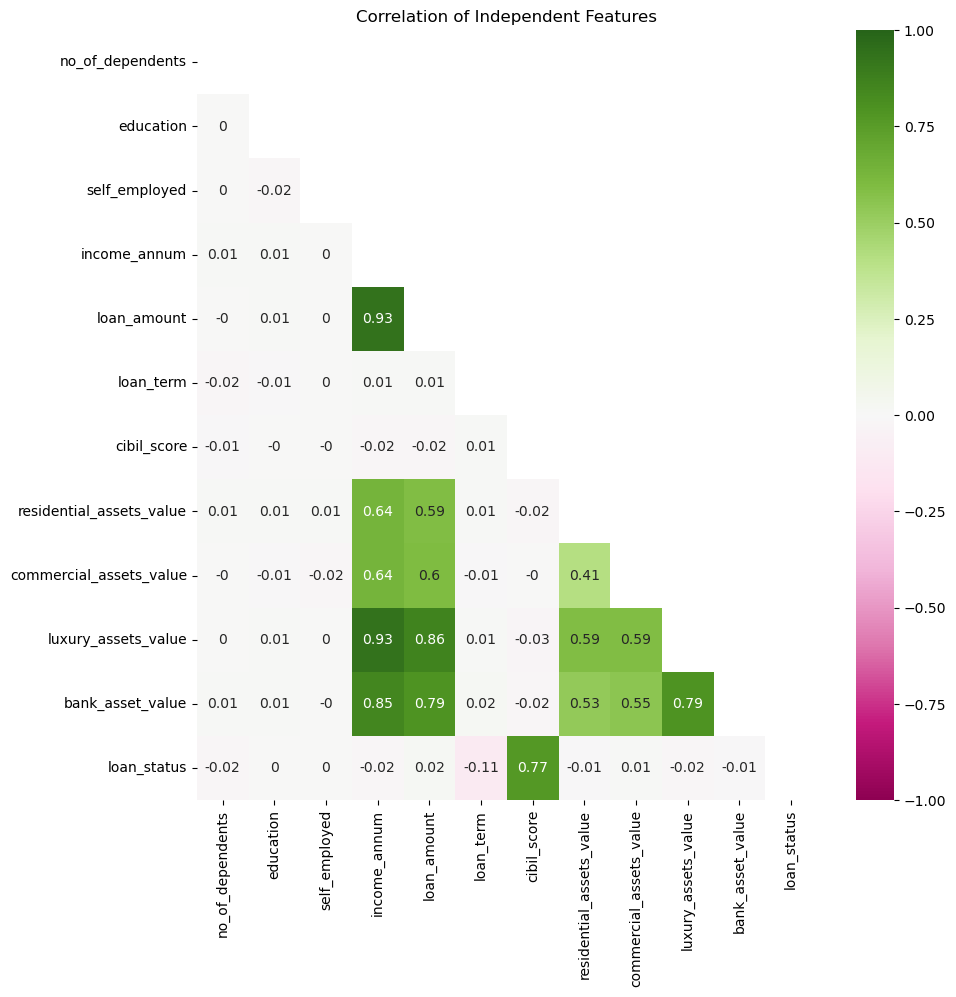

In [12]:
# Create a correlation matrix for the data
matrix = df.corr().round(2)
matrix

fig,ax = plt.subplots(figsize=(10,10))

# visualize it using a heatmap
mask = np.triu(np.ones_like(matrix, dtype=bool))
ax = sns.heatmap(matrix, 
                 annot=True, 
                 vmax=1, 
                 vmin=-1, 
                 center=0, 
                 cmap='PiYG', 
                 mask=mask)

ax.set(title='Correlation of Independent Features');

# save the heatmap to computer
plt.savefig('heatmap.png')

We can see several positive correlations between features in our data, such as:
* Higher incomes applying for larger loan amounts
* Higher incomes having more assets
* Higher cibil scores being approved

### 6. Modeling

In [13]:
# Split features and target 
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [14]:
# Split data into training and test sets
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
X_train

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
2488,2,1,1,32481,76992,18,547,60150,20451,110676,20451
3703,1,0,1,101052,371727,8,378,223758,12030,311577,133533
3347,2,0,0,116691,453531,6,601,3609,37293,286314,141954
3487,5,0,0,81804,216540,12,690,214134,141954,300750,111879
3957,0,0,0,51729,132330,4,374,85413,87819,111879,56541
...,...,...,...,...,...,...,...,...,...,...,...
1033,3,1,0,7218,14436,2,752,13233,6015,27669,8421
3264,5,0,1,9624,25263,12,363,14436,12030,37293,10827
1653,3,0,1,76992,282705,12,684,206916,123909,304359,89022
2607,4,0,0,64962,151578,18,786,3609,30075,252630,79398


#### 6.1 Trying different ML models

In [16]:
models = {'Logistic Regression' : LogisticRegression(),
         'KNN' : KNeighborsClassifier(),
         'Random Forest' : RandomForestClassifier()}

# Function to fit and score models
def fit_score(models, X_train, y_train, X_test, y_test):
    np.random.seed(0)
    scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        scores[name] = model.score(X_test, y_test)
    return scores

In [17]:
scores = fit_score(models, X_train, y_train, X_test, y_test)
scores

{'Logistic Regression': 0.7915690866510539,
 'KNN': 0.5597189695550351,
 'Random Forest': 0.9871194379391101}

#### 6.2 Hyperparameter Tuning

In [18]:
# Tune KNN
train_results = []
test_results = []

params = range(1,21)
clf = KNeighborsClassifier()

for p in params:
    clf.set_params(n_neighbors=p)
    clf.fit(X_train, y_train)
    train_results.append(clf.score(X_train, y_train))
    test_results.append(clf.score(X_test, y_test))

KNN highest score on the test data: 60.66


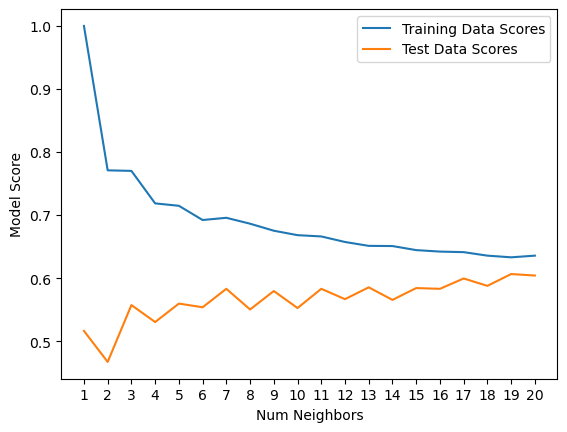

In [19]:
plt.plot(params, train_results, label='Training Data Scores')
plt.plot(params, test_results, label='Test Data Scores')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Num Neighbors')
plt.ylabel('Model Score')
plt.legend()

print(f'KNN highest score on the test data: {max(test_results)*100:.2f}')

Even after tuning, KNN is not performing well enough to consider for the project. 

In [20]:
# Hyperparameter grids

# Logistic Regression
log_grid = {'C': np.logspace(-4, 4, 20),
           'solver': ['liblinear']}

# Random Forest 
rand_grid = {'n_estimators': np.arange(10, 1000, 50),
            'max_depth': [None, 2, 5, 10],
            'min_samples_split': np.arange(2, 20, 2),
            'min_samples_leaf': np.arange(1, 20, 2)}

In [21]:
# Tune logistic regression
np.random.seed(0)

log_reg = RandomizedSearchCV(LogisticRegression(),
                            param_distributions=log_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)
log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [22]:
log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0018329807108324356}

In [23]:
log_reg.score(X_test, y_test)

0.7435597189695551

No improvement over default configuration

In [24]:
# Tune random forest
np.random.seed(0)

rfc_CV = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=rand_grid,
                       cv=5,
                       n_iter=20,
                       verbose=True)
rfc_CV.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 2, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [25]:
# Best hyperparameters
rfc_CV.best_params_

{'n_estimators': 710,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': 10}

In [26]:
rfc_CV.score(X_test, y_test)

0.9812646370023419

No improvement over default configuration

### 7. Evaluation

In [68]:
np.random.seed(0)
pred = rfc_CV.predict(X_test)

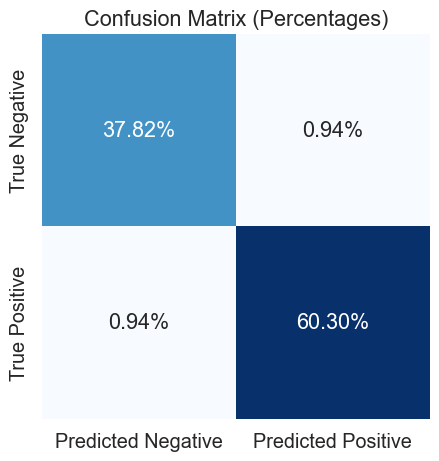

In [69]:
# Plotting a confusion matrix for the model
def plt_conf_mat(y_test, pred):
    sns.set(font_scale=1.3)
    conf_matrix = confusion_matrix(y_test, pred)
    percent_matrix = (conf_matrix / conf_matrix.sum())
    
    fig, ax = plt.subplots(figsize=(5, 5))
    
    ax = sns.heatmap(percent_matrix,
                    annot=True,
                    fmt='.2%',
                    cbar=False,
                    xticklabels=['Predicted Negative', 'Predicted Positive'],
                    yticklabels=['True Negative', 'True Positive'],
                    cmap='Blues')
    
    plt.title('Confusion Matrix (Percentages)')

plt_conf_mat(y_test, pred)

#### 7.1 Cross Validation

In [70]:
# Calculating evaluation metrics using cross-validation
rfc_CV.best_params_

{'n_estimators': 710,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': 10}

In [54]:
def calc_eval_metric(method):
    rfc = RandomForestClassifier(n_estimators=710,
                            min_samples_split=12,
                            min_samples_leaf=5,
                            max_depth=10)
    score = cross_val_score(rfc, X, y, cv=5, scoring=method)
    score = np.mean(score)
    return score

In [55]:
CV_accuracy = calc_eval_metric('accuracy')

In [56]:
CV_precision = calc_eval_metric('precision')

In [57]:
CV_recall = calc_eval_metric('recall')

In [58]:
CV_f1 = calc_eval_metric('f1')

In [59]:
CV_metrics = pd.DataFrame({'Accuracy' : CV_accuracy,
                          'Precision': CV_precision,
                          'Recall' : CV_recall,
                          'F1 Score' : CV_f1},
                         index=[0])

In [60]:
CV_metrics

,Accuracy,Precision,Recall,F1 Score
0,0.979386,0.979876,0.986446,0.982207


#### 7.2 Feature Importance

In [61]:
rfc = RandomForestClassifier(n_estimators=710,
                            min_samples_split=12,
                            min_samples_leaf=5,
                            max_depth=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=12,
                       n_estimators=710)

In [62]:
rfc.feature_importances_

array([0.00361655, 0.00114322, 0.00121196, 0.01117853, 0.01879729,
       0.05881984, 0.86584098, 0.01015595, 0.00973544, 0.01064495,
       0.00885529])

In [63]:
keys = X_train.keys().copy()
keys

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

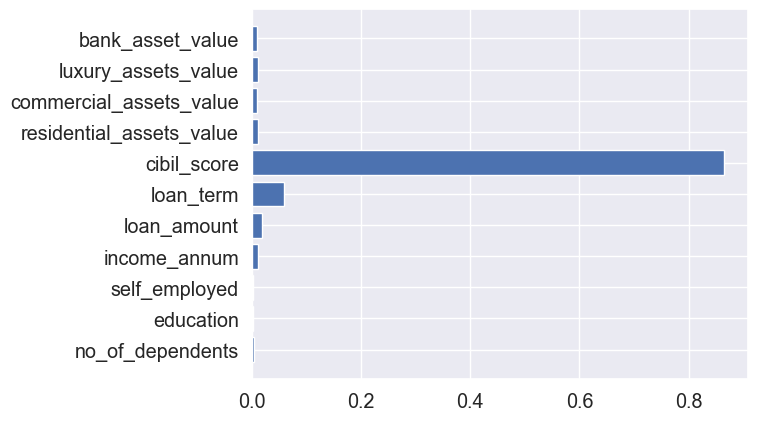

In [64]:
plt.barh(keys, rfc.feature_importances_);

The cibil score is a highly important feature for the model to make a prediction

### 8. Making Predictions
Now that we have found and tuned the optimal model for our dataset, we can use it to make predictions from data it hasn't seen before, to satisfy the bank's business requirement. The attached image shows the ranges for the CIBIL scores. <br><br> 
**To make a prediction, fill out the inputs below and then run the code cell.**

<img src="cibil-score.jpg" alt="Drawing" style="width: 300px;"/>

In [65]:
def make_loan_prediction(dependents, education, self_employed, annual, resedential,
                         commercial, luxury, bank, cibil, amount, length):
    
    applicant = pd.DataFrame({
        'no_of_dependents' : dependents,
        'education' : education, 
        'self_employed' : self_employed,
        'income_annum' : annual,
        'loan_amount' : amount,
        'loan_term' : length,
        'cibil_score' : cibil,
        'residential_assets_value' : resedential,
        'commercial_assets_value' : commercial,
        'luxury_assets_value' : luxury,
        'bank_asset_value' : bank
    }, index=[0])

    for key in applicant.keys():
        applicant[key] = applicant[key].astype(np.int64)
    
    prediction = rfc.predict(applicant)
    if (prediction): return 'Approved'
    else: return 'Denied'

In [66]:
# Number of Financial Dependents (Kids, Spouse, ect.)
dependents = 0 

# Completed Higher Education? (True / False)
education = True

# Applicant Self-employed? (True / False)
self_employed = True 

# Household Cumulative Annual Income ($USD)
annual_income = 100000

# Resedential Assets Value (Home & Rental Properties)
resedential_amount = 100000

# Commercial Assets Value (Office Rental, Other Business Assets)
commercial_amount = 200000

# Luxury Assets Value (Cars, Boats, ect.)
luxury_amount = 432211

# Total Bank Assets (Checkings & Savings)
bank_amount = 32321312

# CIBIL Score (Number)
cibil_score = 780

# Loan Amount ($USD)
loan_amount = 76992

# Loan Term (Years)
loan_term = 10

make_loan_prediction(dependents, education, self_employed, annual_income, resedential_amount,
                         commercial_amount, luxury_amount, bank_amount, cibil_score, loan_amount, loan_term)

'Approved'